# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


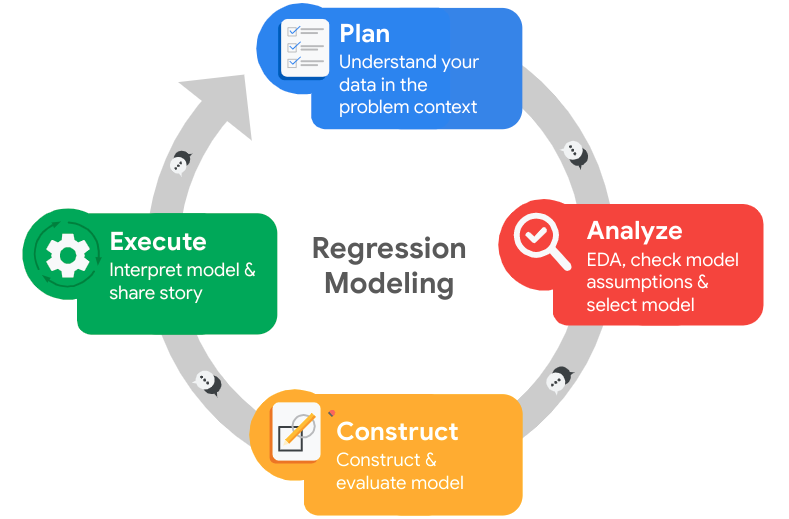

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Salifort employees and executive
2. I am trying to find what factor leads to employees to quit their job and sharing this results to all stakeholders
3. I think salart, promotion_last_5years, number_project must be the key to find the answer
4. notion
5. My model must not be bias

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report
from sklearn.metrics import roc_auc_score, roc_curve

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                   'Department': 'department',
                'time_spend_company': 'tenure'})


# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

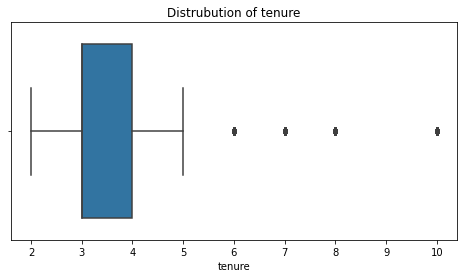

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(8,4))
sns.boxplot(x=df['tenure'])
plt.title('Distrubution of tenure')
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = np.quantile(df['tenure'], 0.25)
q3 = np.quantile(df['tenure'], 0.75)
iqr = q3-q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print('upper bound:', upper)
print('lower bound:', lower)

outlier = df[(df['tenure']> upper) | (df['tenure'] < lower)]
print("Number of outlier in tenure column is:", len(outlier))

upper bound: 5.5
lower bound: 1.5
Number of outlier in tenure column is: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())
print('')

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

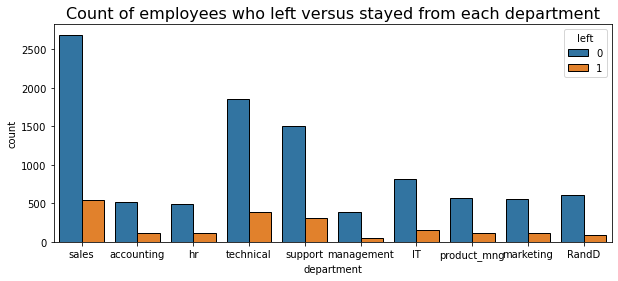

In [14]:
### YOUR CODE HERE ###
plt.figure(figsize=(10,4))
sns.countplot(x=df['department'], hue=df['left'], edgecolor='black')
plt.title("Count of employees who left versus stayed from each department", fontsize='16')
plt.show()

As you can see sales department has the most employees who is still stay, but also has the highest left employees too! however it is not show any significant to make decisiond due to the size of sales department

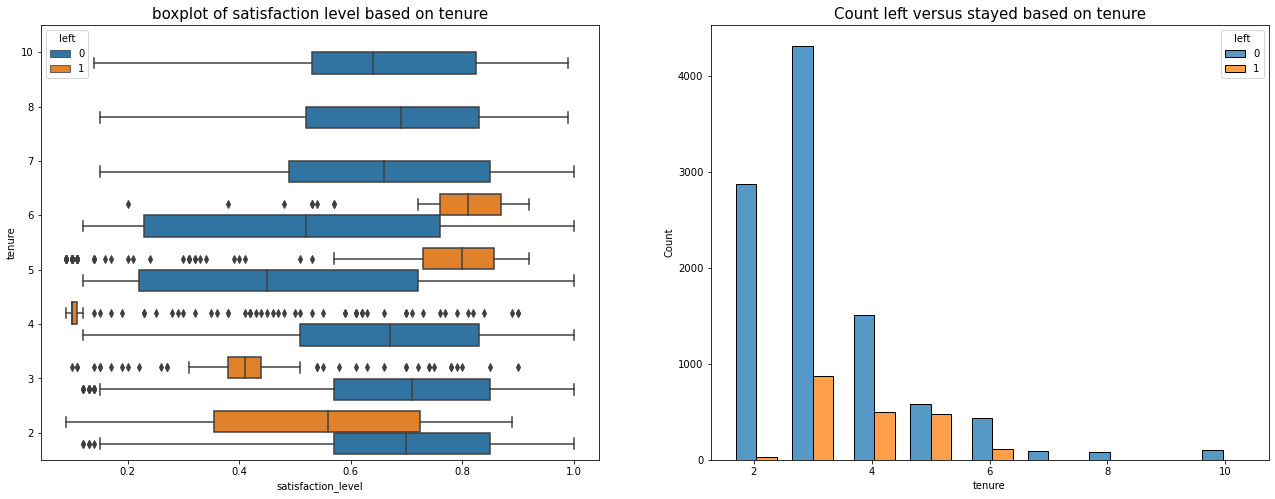

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize = (22,8))

sns.boxplot(x=df['satisfaction_level'], y=df['tenure'], hue=df['left'], ax=ax[0], orient='h')
ax[0].invert_yaxis()
ax[0].set_title('boxplot of satisfaction level based on tenure', fontsize='15')

sns.histplot(x=df['tenure'], hue=df['left'], multiple='dodge', shrink=8, ax=ax[1])
ax[1].set_title('Count left versus stayed based on tenure', fontsize='15')
plt.show()

As we can see in left picture the less employees has stayed in company the median of left group is lower than stayed group maybe it's about cultural of the company. However we can see that tenure = 4 left group has usually dissatisfy because range of boxplot is lower than 0.2. And as we can see the longer employees stays they didn't have any dissatisfy.

In right picture we can see that employees who are left the company are work there for 3-5 years for most then leave. Then let's drive deep down to compare employee between 2-5 years and 7-10 years!

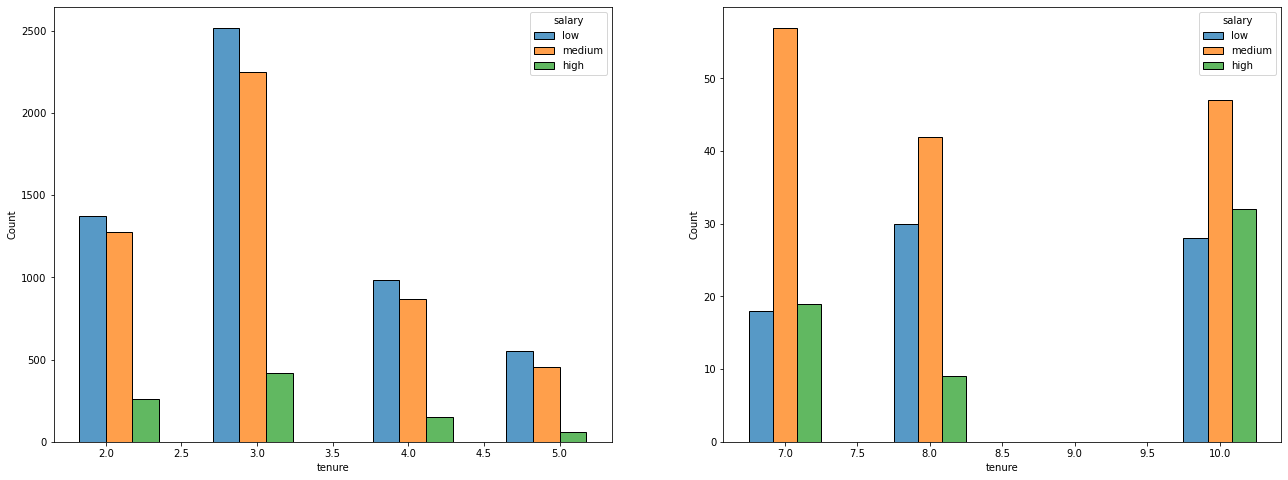

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
df_long = df[ (df['tenure'] >= 7)]
df_short = df[ (df['tenure'] <= 5) & (df['tenure'] != 1)]

fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.histplot(x=df_short['tenure'], hue=df['salary'], multiple='dodge', ax=ax[0], shrink=3)

sns.histplot(x=df_long['tenure'], hue=df_long['salary'], multiple='dodge', ax=ax[1], discrete=1, shrink=.5,
            hue_order=['low', 'medium', 'high'])
plt.show()

As I expect the proportion of longer tenure tend to have medium - high salary, while shor tenure tends to have lower - medium salary. However this factor is may effected by department.

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
df['average_montly_hours'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64

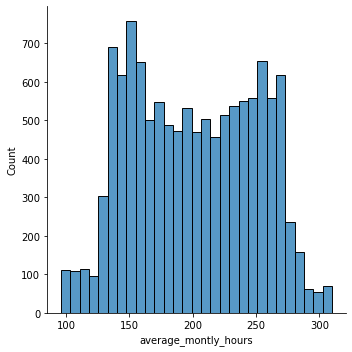

In [18]:
sns.displot(x=df['average_montly_hours'])
plt.show()

From distribution graph of average_montly_hours we can say that is column has two group
1. standard hours: we can see in this group the peak is around 150 hours from 40hrs/week * 4 = 160
2. overtime hours: the peak is around 250 hours which is of course they done an overtime

Now let's categorize two group by using median of this column

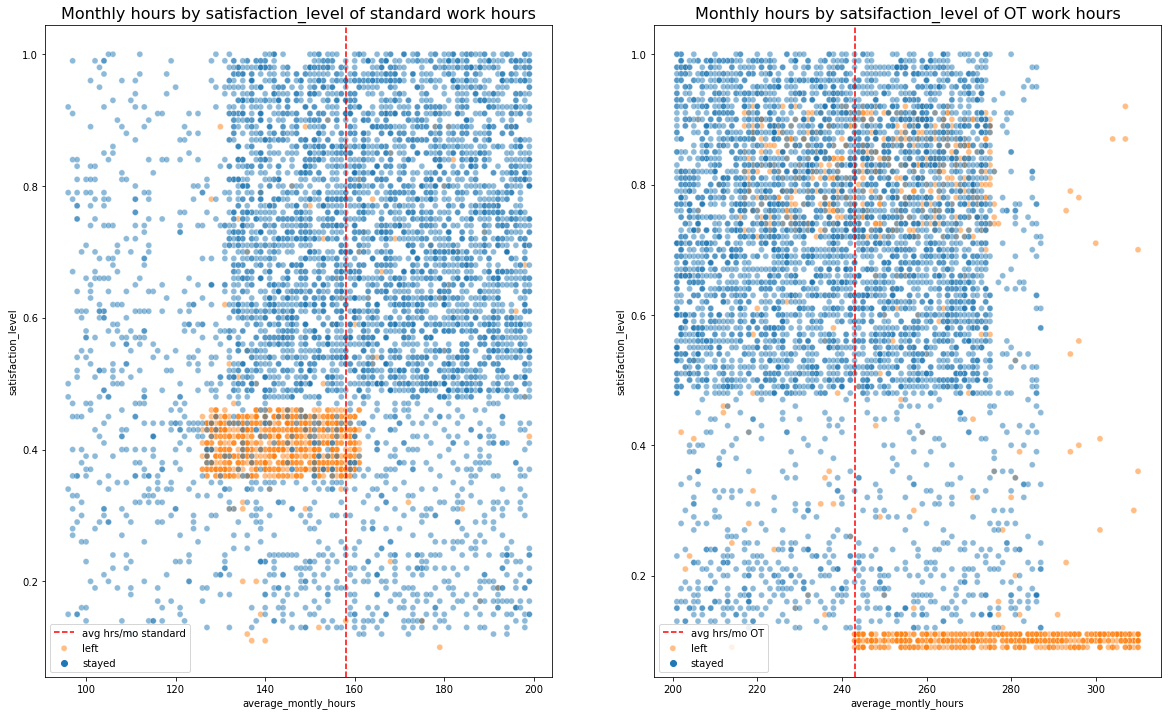

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# prep data
standard = df[ df['average_montly_hours'] < df['average_montly_hours'].median()]
OT = df[ df['average_montly_hours'] > df['average_montly_hours'].median()]
avg_standard = standard['average_montly_hours'].mean()
avg_OT = OT['average_montly_hours'].mean()

#plot
fig, ax = plt.subplots(1,2, figsize=(20,12))
sns.scatterplot(x=standard['average_montly_hours'], y=standard['satisfaction_level'],
                hue=standard['left'], ax=ax[0], alpha=0.5)
ax[0].axvline(x=avg_standard, color = 'red', label = 'avg hrs/mo standard', ls='--')
ax[0].legend(labels=['avg hrs/mo standard', 'left', 'stayed'])
ax[0].set_title('Monthly hours by satisfaction_level of standard work hours', fontsize=16)

sns.scatterplot(x=OT['average_montly_hours'], y=OT['satisfaction_level'],
               hue=OT['left'], ax=ax[1], alpha=0.5)
ax[1].axvline(x=avg_OT, color = 'red', label = 'avg hrs/mo OT', ls='--')
ax[1].legend(labels=['avg hrs/mo OT', 'left', 'stayed'], loc=3)
ax[1].set_title('Monthly hours by satsifaction_level of OT work hours', fontsize=16)
plt.show()

As we can see in standard work hours on left side we can spot a huge left group around 130 - 160 average_monthly_hours with 0.3-0.5 (approximate) satisfaction_level we can call this zone as burnout zone which mean employees with moderate hours (or below avarage of working hours in standard) of working but low satisfaction_level will lead to leave.

And in the right side we can spot that left group is higher than average of working hours in OT dataset and other than that thier satisfaction_level is very low it is below 0.2, so with this we can dig deeper to know more what happend to this group

In [20]:
print('Number of employees who left the company in standard work hours:', len(standard[ standard['left'] == 1]))
print('Number of employees who left the company in OT work hours:', len(OT[ OT['left']==1]))

Number of employees who left the company in standard work hours: 910
Number of employees who left the company in OT work hours: 1081


Also we can say that the longer they work, they tent to leave the company with 1081 employees who left the company in OT dataset compare to 910 employees who left the company in standard dataset

In [21]:
# OT satisfaction < 0.2
OT_low_satis = OT[ (OT['satisfaction_level'] < 0.2) & (OT['average_montly_hours'] >= avg_OT)]
OT_low_satis['left'].value_counts(normalize=True)

1    0.824793
0    0.175207
Name: left, dtype: float64

There are  82.48% of left employees who have satisfaction_level lower than 0.2 and work more than average working hours in OT dataset (approximate 243.12)

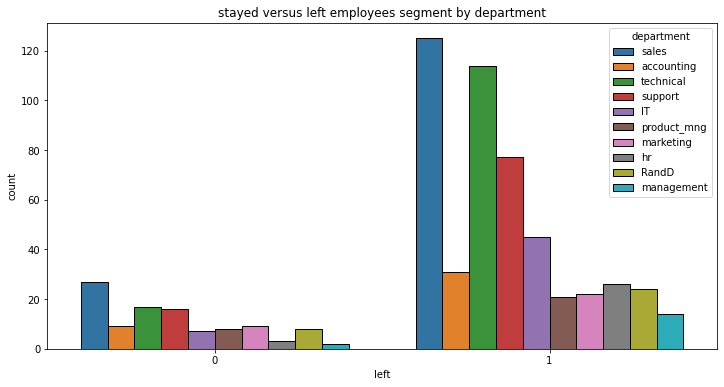

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x=OT_low_satis['left'], hue=OT_low_satis['department'], edgecolor='black')
plt.title('stayed versus left employees segment by department')
plt.show()

So sales and technical are the most department that employees are leave

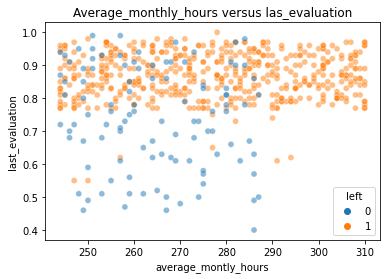

In [23]:
sns.scatterplot(x=OT_low_satis['average_montly_hours'], y=OT_low_satis['last_evaluation'], hue=OT_low_satis['left'],
               alpha=0.5)
plt.title('Average_monthly_hours versus las_evaluation')
plt.show()

Wow most of employees who quit their job tent to have high evaluate score. Let's drive deeper

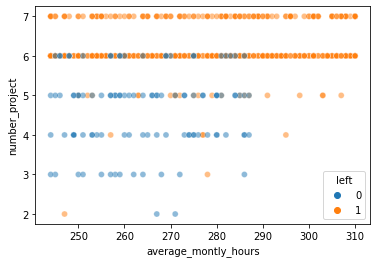

In [24]:
sns.scatterplot(x=OT_low_satis['average_montly_hours'], y=OT_low_satis['number_project'], hue=OT_low_satis['left'],
               alpha=0.5)

And also most of left employees have a lot of project to do! Maybe this the problem

In [25]:
left_OT = OT_low_satis[ (OT_low_satis['left']==1) & (OT_low_satis['number_project']>=6)]
left_OT['salary'].value_counts(normalize=True)

low       0.584746
medium    0.398305
high      0.016949
Name: salary, dtype: float64

most of employees whom left have low (58.47%) to medium (39.83%) salary maybe this is a reason why they quit

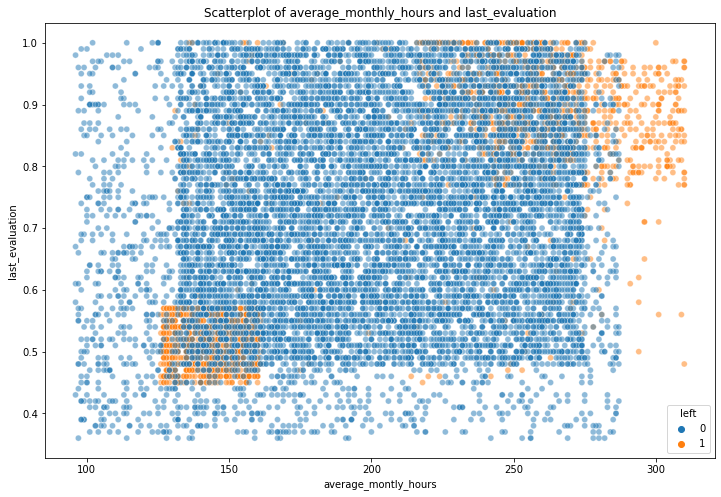

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['average_montly_hours'], y=df['last_evaluation'], hue=df['left'], alpha = 0.5)
plt.title('Scatterplot of average_monthly_hours and last_evaluation')
plt.show()

We can see that there are 2 groups of left employees, one is moderate monthly hours but low evaluate score, two is high monthly hours with high evaluate score. The interesting part is in the first group(lower left) might be the same group with Monthly hours by satisfaction_level of standard work hours graph I created before!

In [27]:
# extract data
df_left = df[df['left']==1]

# create zone
zone_A = df_left[ 
    (df['average_montly_hours'] >= 120) & (df['average_montly_hours'] <= 170) &
    (df['satisfaction_level'] >= 0.3) & (df['satisfaction_level'] <= 0.5)]

zone_B = df_left[
    (df['average_montly_hours'] >= 120) & (df['average_montly_hours'] <= 170) &
    (df['last_evaluation'] >= 0.4) & (df['last_evaluation'] <= 0.6)
]
num_A = len(zone_A)
num_B = len(zone_B)
print(f'Number of employees in zone A:', {num_A})
print(f'Number of employees in zone B:', {num_B})

# check for overlab
indices_A = set(zone_A.index)
indices_B = set(zone_B.index)

common_indices = indices_A.intersection(indices_B)
num_com_indices = len(common_indices)
print(f'Number of employees that intersect in A and B:', {num_com_indices})

Number of employees in zone A: {845}
Number of employees in zone B: {843}
Number of employees that intersect in A and B: {834}


From the result we can see that in zone A (satisfaction level) and zone B (last evaluation) is the same group with the percentage of zone A is in a zone B = 98.69% and percentage of zone B is in a zone A = 98.93%. We can inspect this through descriptive stat

In [28]:
common_em_df = df_left.loc[list(common_indices)]

print('Descriptive satat for zone A')
print(zone_A[['average_montly_hours', 'satisfaction_level', 'last_evaluation']].describe())

print('\nDescriptive satat for zone B')
print(zone_B[['average_montly_hours', 'satisfaction_level', 'last_evaluation']].describe())

print('\nDescriptive satat for intersect zone')
print(common_em_df[['average_montly_hours', 'satisfaction_level', 'last_evaluation']].describe())

Descriptive satat for zone A
       average_montly_hours  satisfaction_level  last_evaluation
count            845.000000          845.000000       845.000000
mean             143.585799            0.407882         0.514757
std               10.114219            0.031107         0.051967
min              126.000000            0.310000         0.450000
25%              135.000000            0.380000         0.480000
50%              144.000000            0.410000         0.510000
75%              152.000000            0.430000         0.540000
max              161.000000            0.500000         1.000000

Descriptive satat for zone B
       average_montly_hours  satisfaction_level  last_evaluation
count            843.000000          843.000000       843.000000
mean             143.626335            0.409632         0.510961
std               10.165805            0.042702         0.036493
min              126.000000            0.110000         0.450000
25%              135.000000    

As we can see the descriptive statistic are almost the same!

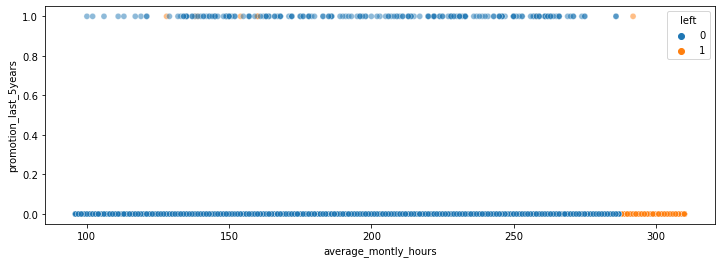

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,4))
sns.scatterplot(x=df['average_montly_hours'], y=df['promotion_last_5years'], hue=df['left'], alpha=0.5)
plt.show()

This result is the same that I done before that the more working hours make employees to leave their job

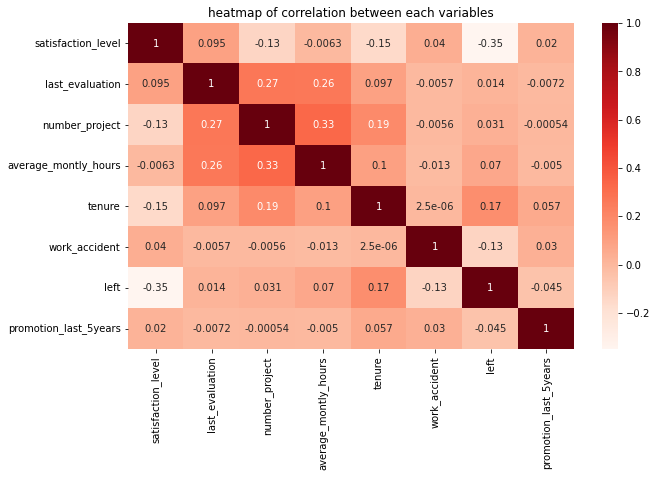

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('heatmap of correlation between each variables')
plt.show()

first `left` and `satisfaction_level` have negative correlation which is common sense because higher `satisfaction_level` make `left` decrease.

And `number_project`, `average_monthly_hours`, and `last_evaluation` have some correlation to each other

### Insights

We can separate left group into two group
- first group I will called as moderate worktime: Their work hours are lower to equal to average working hours and that make the `satisfaction_score` and `last_evaluation` score is very low
- second group I will called as burned out: In this group they have done a lot of project (6-7 projects) and working hours more than 240 hours but most of them have only low to medium salary which is leading them to feel dissatisfaction

In conclusion, The reason why company facing high churn rate is because poor management. Most of the work is falling to only a few people, to the extent that others are not getting as much work as they should.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

type of prediction is categorical

### Identify the types of models most appropriate for this task.

it is better to use logistic regression, decision tree, and randomforest

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Logistic Regression
We use logistic regression for binary categorical. What will we do is first we will change two columns into to binary types and then we will normalize data because losgistic regression is sensitive to outlier

In [31]:
### YOUR CODE HERE ###
df_en = df.copy()

df_en['salary'] = df_en['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

df_en = pd.get_dummies(df_en,drop_first=False)

df_en.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# eliminate outlier
df_logreg = df_en.loc[ (df_en['tenure'] >= lower) & (df_en['tenure'] <= upper)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


After preprocessing then let's split the data by create target variable in y and prediction variable in X then split data into 80/20 with `stratify=y` because imbalance between left and stayed

In [33]:
# create target variable in y
y = df_logreg['left']

# create prediction variables in X
X = df_logreg.drop(columns=['left'])

# train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8375, 18), (2792, 18), (8375,), (2792,))

fit the model

In [34]:
%%time
# create model
clf = LogisticRegression(random_state=42, max_iter=500)

# fit data
clf.fit(X_train, y_train)

CPU times: user 41.3 s, sys: 53 s, total: 1min 34s
Wall time: 47.2 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Test the model with test set!

In [35]:
# test
y_pred = clf.predict(X_test)

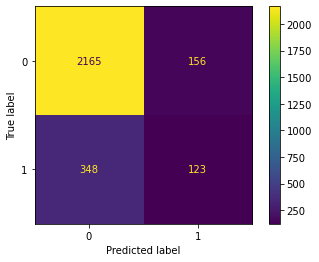

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= clf.classes_)

disp.plot(values_format='')
plt.show()

From confusion martix we can inspect that

True positive (lower right): the number of employees who left the company and model predict left = 102

False positive (upper right): the number of employees who didn't left the company but model predict left = 129

True Nagative (upper left): the number of employees who didn't left the company and model predict not left = 1728

False negative (lower left): the number of employees who left the company and model predict not left = 275

So with class imbalance the dataset and the cost of false negative (left but predict didn't left) is higher than false positive (didn't left but predict left) then we will focus on Recall score when we compare to other model

In [37]:
# model score
print('Accuracy score:', recall_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

target_name = ["Predicted wouldn't leave", "Predicted would leave"]
print('\n',classification_report(y_test, y_pred, target_names=target_name))

Accuracy score: 0.2611464968152866
Precision score: 0.44086021505376344
Recall score: 0.2611464968152866
F1 score: 0.328

                           precision    recall  f1-score   support

Predicted wouldn't leave       0.86      0.93      0.90      2321
   Predicted would leave       0.44      0.26      0.33       471

                accuracy                           0.82      2792
               macro avg       0.65      0.60      0.61      2792
            weighted avg       0.79      0.82      0.80      2792



As we can see our model perform well when predict wouldn't leave but poorly in predict would leave. It happen because class imbalance between would leave (16.6% of dataset) and would not leave (83.4% of dataset) in dataset.

#### Decision tree Round 1

In decision tree model we will create new set called validate set with proportion of 60/20/20

In [38]:
# create test set
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# create validate set
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, random_state = 42, test_size=0.2)

fit model

In [39]:
# model
tree1 = DecisionTreeClassifier(random_state=42)

# create dictionary of hyperparameters
cv_params = {'max_depth': [4,5,None],
            'min_samples_leaf': [1,2,5],
            'min_samples_split': [2,4,6]
            }

# scoring
scoring = ['accuracy', 'precision', 'recall', 'f1']

# GridSearch
tree_cv = GridSearchCV(tree1, cv_params, scoring=scoring, cv=4, refit='recall')

In [40]:
%%time
# fit model
tree_cv.fit(X_train, y_train)

CPU times: user 1.64 s, sys: 0 ns, total: 1.64 s
Wall time: 1.64 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, None],
                         'mi

get best score and best parameters

In [41]:
# best score
print(tree_cv.best_score_)

# best parameter
print(tree_cv.best_params_)

0.9177740863787376
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


Create function to extract all the scores from gridsearch

In [84]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [43]:
results = []
results = make_results("Tree_CV", tree_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,Tree_CV,0.968462,0.917774,0.942363,0.981109


Then let's test with validation set using best estimator

In [44]:
tree_val_pred = tree_cv.best_estimator_.predict(X_val)

Create function to get test scores

In [45]:
def get_test_scores(model_name:str, preds, y_test_data):
    
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [46]:
tree_val_score = get_test_scores("Tree_val", tree_val_pred, y_val)

results = pd.concat([results, tree_val_score], axis=0)
results

,model,precision,recall,F1,accuracy
0,Tree_CV,0.968462,0.917774,0.942363,0.981109
0,Tree_val,0.972028,0.923588,0.947189,0.982652


Validate model is perform better than CV as recall 92.36% vs. 91.78%

#### Random forest

In [47]:
# model
rf = RandomForestClassifier(random_state=42)

# create dictionary of hyperparameters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
# scoring
scoring = ['accuracy', 'precision', 'recall', 'f1']

# GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

fit random forest to data

In [48]:
%%time
rf_cv.fit(X_train,y_train)

CPU times: user 7min 34s, sys: 0 ns, total: 7min 34s
Wall time: 7min 34s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [49]:
path = '/home/jovyan/work/'

In [50]:
def write_pickle(path, model_object, save_as:str):

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [51]:
def read_pickle(path, saved_model_name:str):

    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [52]:
write_pickle(path,rf_cv, 'hr_rf_cv')

In [53]:
rf_cv = read_pickle(path, 'hr_rf_cv')

In [54]:
print(rf_cv.best_score_)
print('\n', rf_cv.best_params_)

0.920265780730897

 {'max_depth': 3, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [58]:
rf_cv_results = make_results('RF CV', rf_cv, 'recall')
results = pd.concat([results, rf_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Tree_CV,0.968462,0.917774,0.942363,0.981109
0,Tree_val,0.972028,0.923588,0.947189,0.982652
0,RF CV,0.923253,0.920266,0.921725,0.973692


In [59]:
# test with validation set
rf_val_pred = rf_cv.best_estimator_.predict(X_val)

In [62]:
rf_val_score = get_test_scores("RF val", rf_val_pred, y_val)
results = pd.concat([results, rf_val_score], axis=0)
results

,model,precision,recall,F1,accuracy
0,Tree_CV,0.968462,0.917774,0.942363,0.981109
0,Tree_val,0.972028,0.923588,0.947189,0.982652
0,RF CV,0.923253,0.920266,0.921725,0.973692
0,RF val,0.899351,0.920266,0.909688,0.969222


Decision tree still hold on top of best performance!

##### Selecting the champion

We will use Decision tree for test set

In [102]:
tree_test_preds = tree_cv.best_estimator_.predict(X_test)

tree_test_result = get_test_scores('Tree test', tree_test_preds, y_test)

results = pd.concat([results, tree_test_result], axis=0)
results

,model,precision,recall,F1,accuracy
0,Tree_CV,0.968462,0.917774,0.942363,0.981109
0,Tree_val,0.972028,0.923588,0.947189,0.982652
0,RF CV,0.923253,0.920266,0.921725,0.973692
0,RF val,0.899351,0.920266,0.909688,0.969222
0,Tree test,0.985955,0.931034,0.957708,0.986124


With the test set our model perform even better with recall score = 93.10%

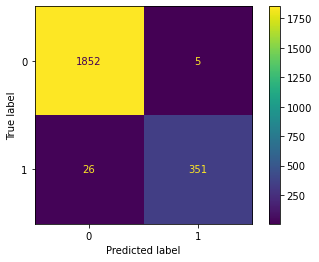

In [103]:
cm = confusion_matrix(y_test, tree_test_preds, labels=tree_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= tree_cv.classes_)

disp.plot(values_format='')
plt.show()

Our model predict more on True positive and reduce the false negative that is has more cost than false positive in this case.

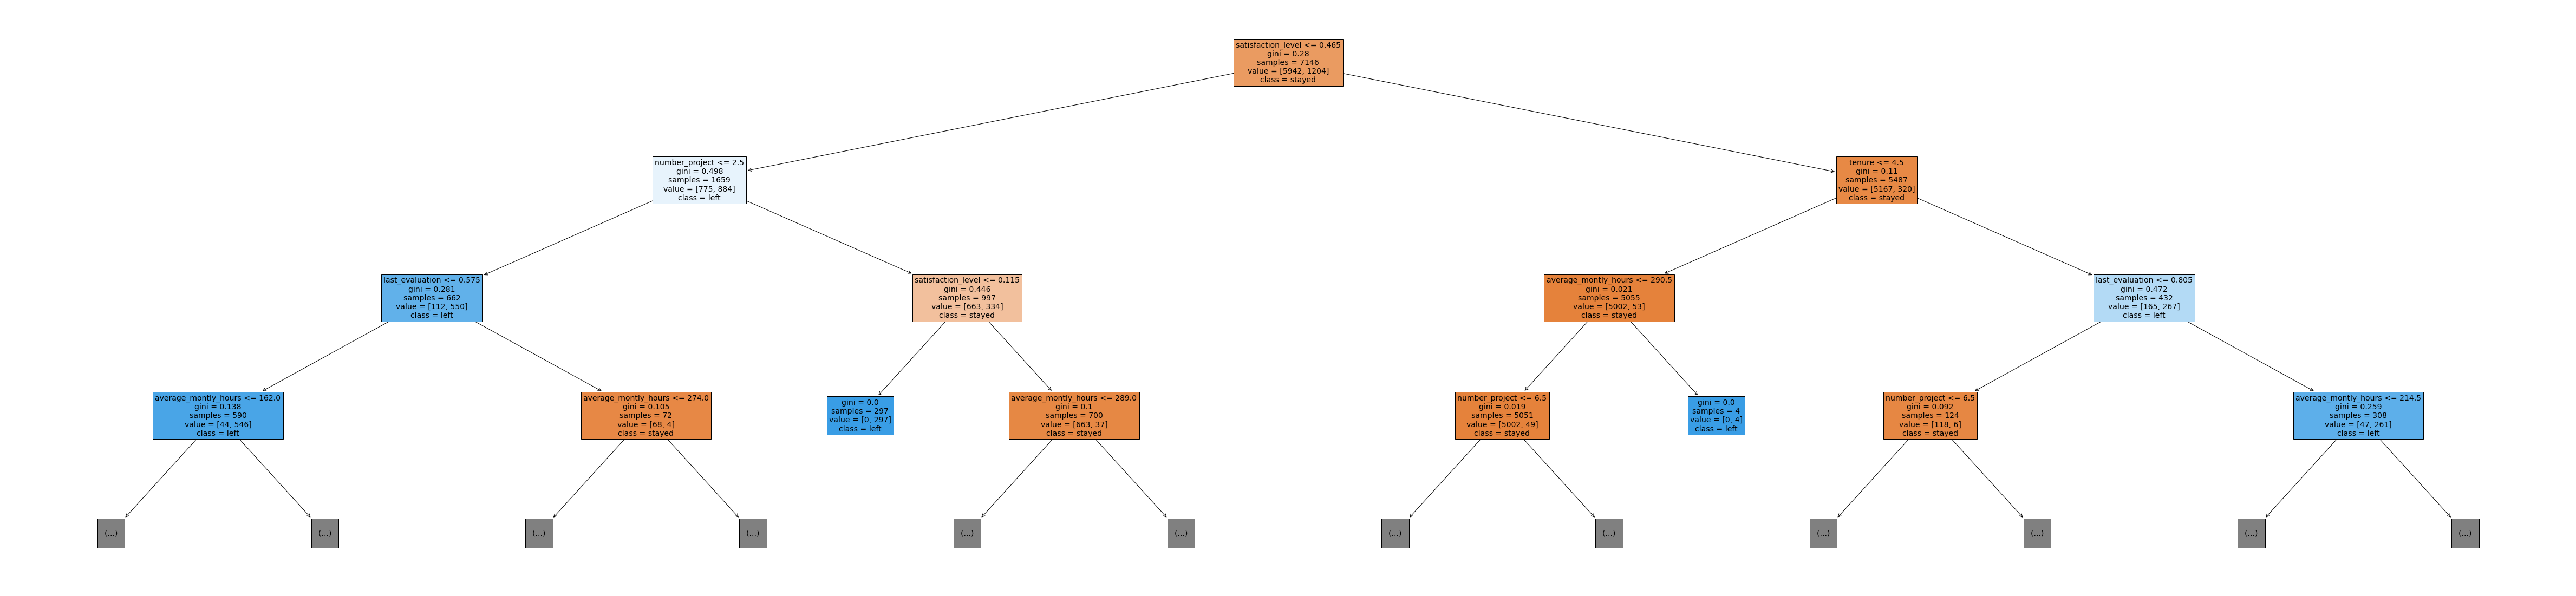

In [106]:
plt.figure(figsize=(85,20))
plot_tree(tree_cv.best_estimator_, max_depth=3, fontsize=14, feature_names=X.columns,
         class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

In [109]:
Tree_cv_importances = pd.DataFrame(tree_cv.best_estimator_.feature_importances_,
            columns=['gini_importance'],
            index=X.columns)

Tree_cv_importances = Tree_cv_importances.sort_values(by='gini_importance', ascending=False)

Tree_cv_importances = Tree_cv_importances[Tree_cv_importances['gini_importance'] != 0]
Tree_cv_importances

,gini_importance
satisfaction_level,0.541462
tenure,0.165272
last_evaluation,0.118117
number_project,0.115579
average_montly_hours,0.059570


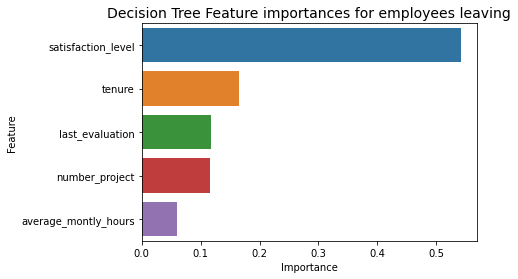

In [112]:
sns.barplot(x=Tree_cv_importances['gini_importance'], y=Tree_cv_importances.index, orient='h')
plt.title('Decision Tree Feature importances for employees leaving', fontsize=14)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Satisfaction_level is a crucial feature to predict employees leaving
2. I reccomment manager to care more about employees. Try to ask about their work do they feel overwork or not
3. Maybe if we transform some features it will help the model to perform better

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Logistic Regression
The Logistic Regression is perform if we focus on predicting employees who leave especially recall score with 26.11%

#### Tree-based model
With best estimator this model perform very well with test set with recall score 93.10%. However Random forest isn't a bad choice too

### Conclusion, Recommendations, Next Steps

Company should use this insighs to focus on employees who overwork. Try to cap the number of project each employees to be around 3-5 projects which could lead satisfaction_level to be better.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.